In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "..")))
from src.utils.model_utils.param_choice_utils import *
from src.utils.model_utils.initialise import *
from src.utils.model_utils.param_choice_utils.train_data_anal_loader import ProteinLigandDataset
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
dataset_path = os.path.join(project_root, "outputs", "datasets.pt")
train_data_components = load_train_data_components(dataset_path)

[Initialise] Project root set to: /media/racah/2b2b05ab-497e-47ab-a698-6e77a3b775c4/grisha/for_ProtLigMap/src
[Initialise] Current working dir now: /media/racah/2b2b05ab-497e-47ab-a698-6e77a3b775c4/grisha/for_ProtLigMap/src


## Step 1
Let's check out the distributions of similarities of all of our 3 components of loss, to understand better how to design the loss and the training data

In [2]:
bins_components = get_bins(train_data_components)

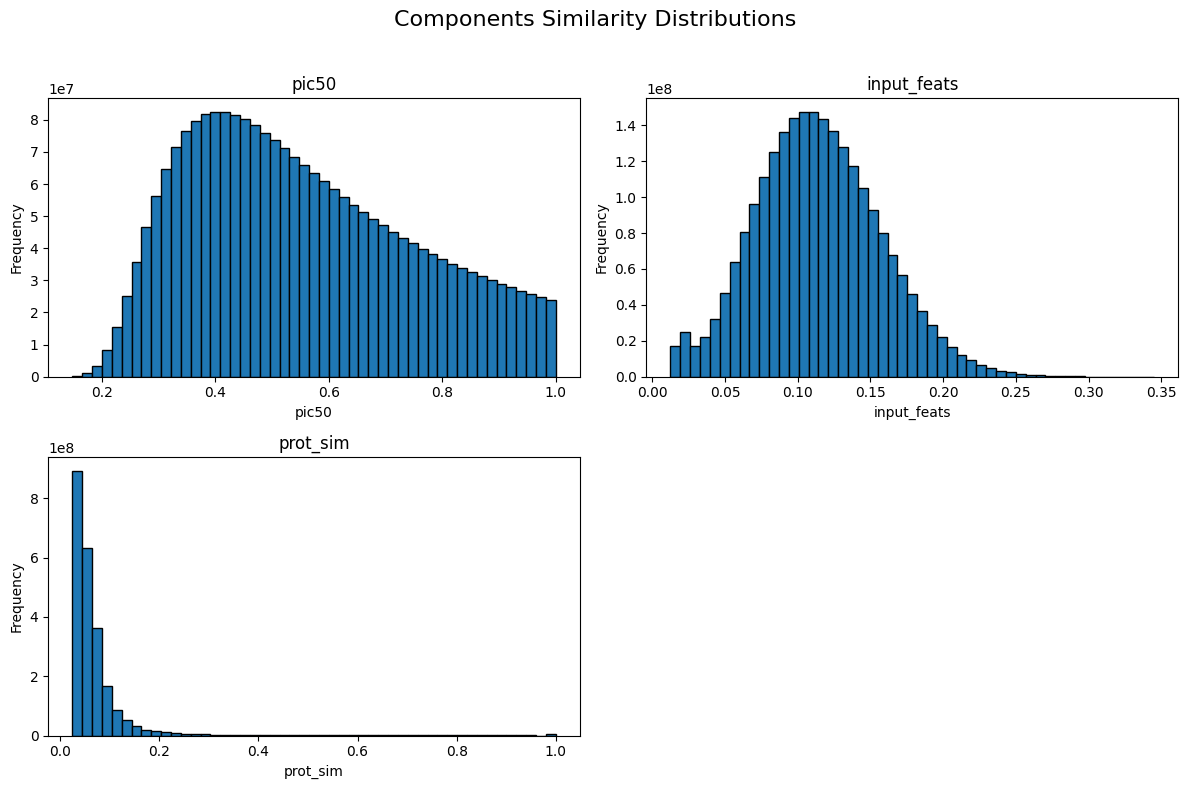

In [3]:
plot_components_bins(bins_components)

Now let's find suggested weights we shoudl give to each of the components

In [4]:
weights = suggest_weights(train_data_components)
w_protein, w_affinity, w_input = weights['w_protein'], weights['w_affinity'], weights['w_input']

Variance-based suggested weights (exclude=[]):
  Protein:  0.002187 -> w_protein=0.051
  Affinity: 0.040606 -> w_affinity=0.949
  Input:    0.000015 -> w_input=0.000


/media/racah/2b2b05ab-497e-47ab-a698-6e77a3b775c4/grisha/for_ProtLigMap/src/utils/model_utils/param_choice_utils/compute_combined_similarity.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  prot_sim = torch.tensor(prot_sim_vals, dtype=torch.float32)


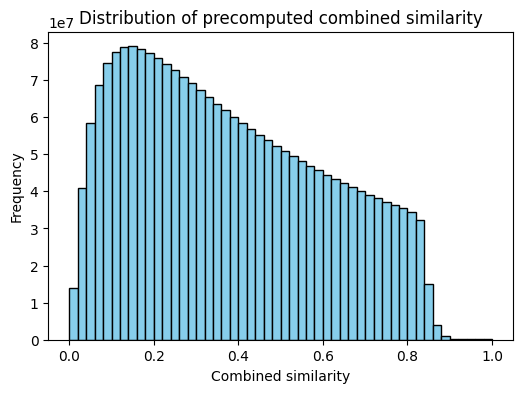

(tensor([0.3155, 0.1545, 0.1850,  ..., 0.8330, 0.2929, 0.2440]),
 array([13931695, 40811298, 58348623, 68681256, 74547170, 77615464,
        78928173, 79097530, 78507737, 77440425, 76029001, 74444422,
        72714478, 70944884, 69093152, 67270969, 65440855, 63648857,
        61888037, 60166078, 58491912, 56870247, 55291647, 53757530,
        52289159, 50854542, 49499296, 48151889, 46880008, 45634772,
        44433248, 43294376, 42172601, 41101741, 40067291, 39062825,
        38100787, 37166170, 36267114, 35392154, 34546653, 32185557,
        14983786,  3970071,   967841,   267465,   119642,    91911,
           69052,    59937]),
 array([6.8625166e-05, 2.0067254e-02, 4.0065881e-02, 6.0064510e-02,
        8.0063142e-02, 1.0006177e-01, 1.2006040e-01, 1.4005902e-01,
        1.6005765e-01, 1.8005627e-01, 2.0005490e-01, 2.2005354e-01,
        2.4005216e-01, 2.6005080e-01, 2.8004944e-01, 3.0004805e-01,
        3.2004669e-01, 3.4004533e-01, 3.6004394e-01, 3.8004258e-01,
        4.0004119e-01

In [5]:
compute_combined_similarity(train_data_components)

In [2]:
pos_weight, neg_weight, pos_threshold, neg_median = compute_pos_neg_weights_stream(train_data_components)

/media/racah/2b2b05ab-497e-47ab-a698-6e77a3b775c4/grisha/for_ProtLigMap/src/utils/model_utils/param_choice_utils/est_margin.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  prot_sim = torch.tensor(prot_sim_vals, dtype=torch.float32)


Streaming pos_weight: 1.224, neg_weight: 0.845
Median of negative pairs: 0.3609
